In [1]:
import tweepy
import webbrowser
import re
import pandas as pd
import numpy as np
import spacy
nlp = spacy.load('en_core_web_lg')

In [53]:
import keys.keys as keys
from tweepy.streaming import StreamListener

In [ ]:
auth = tweepy.OAuthHandler(consumer_key=keys.CONSUMER_KEY, consumer_secret=keys.CONSUMER_SECRET)
auth.set_access_token(keys.ACCESS_KEY, keys.ACCESS_SECRET)

In [5]:
api = tweepy.API(auth, wait_on_rate_limit=True)

In [6]:
me = api.me()
me.screen_name

'snugglybae'

In [163]:
other_user = 'microsoft'
tweets = tweepy.Cursor(api.user_timeline, screen_name=other_user).items(20)
df_1 = tweet_into_dataframe(tweets)

In [164]:
df_1.iloc[0]

created_at                                      Sat Dec 05 01:01:57 +0000 2020
id                                                         1335026590065905664
id_str                                                     1335026590065905664
text                                                           @TheMysticFez ❤
truncated                                                                False
entities                     {'hashtags': [], 'symbols': [], 'user_mentions...
source                       <a href="https://mobile.twitter.com" rel="nofo...
in_reply_to_status_id                                              1.33501e+18
in_reply_to_status_id_str                                  1335007344447561729
in_reply_to_user_id                                                1.26298e+18
in_reply_to_user_id_str                                    1262984289647333376
in_reply_to_screen_name                                           TheMysticFez
user                         {'id': 74286565, 'id_st

# Filtering Tweets with replies to Microsofts

In [38]:
name = 'Microsoft'
tweet_id = '1329927013738577921'

In [39]:
result_types = ['mixed', 'recent', 'popular']

In [120]:
tweets = tweepy.Cursor(api.search, q='to:'+name+' until:2020-12-05').items(20)
df_replies = tweet_into_dataframe(tweets)

In [153]:
df_replies.keys()

Index(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities',
       'extended_entities', 'metadata', 'source', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo',
       'coordinates', 'place', 'contributors', 'is_quote_status',
       'retweet_count', 'favorite_count', 'favorited', 'retweeted',
       'possibly_sensitive', 'lang', 'retweeted_status', 'quoted_status_id',
       'quoted_status_id_str', 'quoted_status'],
      dtype='object')

In [162]:
df_replies.iloc[0]

created_at                                      Fri Dec 04 23:59:00 +0000 2020
id                                                         1335010747244371968
id_str                                                     1335010747244371968
text                         @Microsoft @BagelBites and @MountainDew onlyy....
truncated                                                                False
entities                     {'hashtags': [], 'symbols': [], 'user_mentions...
extended_entities            {'media': [{'id': 1335010741317894145, 'id_str...
metadata                     {'iso_language_code': 'en', 'result_type': 're...
source                       <a href="https://mobile.twitter.com" rel="nofo...
in_reply_to_status_id                                              1.33491e+18
in_reply_to_status_id_str                                  1334909078406049793
in_reply_to_user_id                                                7.42866e+07
in_reply_to_user_id_str                             

In [159]:
df_replies[['created_at', 'text', 'user', ]]

,created_at,id,text,user
0,Fri Dec 04 23:59:00 +0000 2020,1335010747244371968,@Microsoft @BagelBites and @MountainDew onlyy....,"{'id': 3303147278, 'id_str': '3303147278', 'na..."
1,Fri Dec 04 23:56:57 +0000 2020,1335010234683822085,"@Microsoft Thank you, now could I have an Inte...","{'id': 3838098333, 'id_str': '3838098333', 'na..."
2,Fri Dec 04 23:55:39 +0000 2020,1335009904663404549,@Microsoft @XboxGamePass You guys crack me TF up,"{'id': 975897749244833792, 'id_str': '97589774..."
3,Fri Dec 04 23:55:38 +0000 2020,1335009902033440768,RT @XboxGamePass: @Microsoft who wants to know?,"{'id': 1157533635521593345, 'id_str': '1157533..."
4,Fri Dec 04 23:54:25 +0000 2020,1335009595887128577,@Microsoft you guys need to do better releasin...,"{'id': 1332902571284049924, 'id_str': '1332902..."
5,Fri Dec 04 23:54:10 +0000 2020,1335009532825784322,@Microsoft @XboxP3 you guys literally took my ...,"{'id': 3185668772, 'id_str': '3185668772', 'na..."
6,Fri Dec 04 23:53:05 +0000 2020,1335009261466873861,"@Microsoft thanks a lot Microsoft person, hopi...","{'id': 135164159, 'id_str': '135164159', 'name..."
7,Fri Dec 04 23:52:43 +0000 2020,1335009168382681092,"@Microsoft Thanks, person. I have to say it wa...","{'id': 975897749244833792, 'id_str': '97589774..."
8,Fri Dec 04 23:52:40 +0000 2020,1335009155233554439,@Microsoft https://t.co/sSwDSUhqxU,"{'id': 745412831726567425, 'id_str': '74541283..."
9,Fri Dec 04 23:52:22 +0000 2020,1335009080818225153,@Microsoft 💞✨,"{'id': 1062822412532805633, 'id_str': '1062822..."


In [ ]:
df_replies.info()

# Creating SQL database

In [47]:
PATH = 'Users/juhyunlee/Documents/GitHub/capstone-twitter-analysis'

from sqlalchemy import create_engine
engine = create_engine('sqlite:////'+PATH+'/data/tweets.db', echo=False)

df_replies.to_sql('test', con=engine, if_exists='append')

In [46]:
engine.execute("SELECT * FROM microsoft").fetchall()

[]

In [194]:
binary_model = uc.load_data('models/binary_nb_model')

def prototype(model='binary'):
    user_input = input('Write a review: ')
    
#     text = get_clean_text(user_input)
#     word_emb = get_vector(text)
    if model=='binary':
        model = binary_model
    else:
        model = multiclass_word_emb
    print('-'*30)
#     print('Product: ', predict_product(text))
    print('Sentiment: ', predict_sentiment(model, user_input))
    print('Confidence: ', round(get_confidence(model, user_input)*100, 2), '%')
    print('-'*30)
    print('\n')
def prototype_2(text):
    text = get_clean_text(text)

    sentiment = predict_sentiment(binary_model, text)
    confidence = round(get_confidence(binary_model, text)*100, 2)
    return (sentiment, confidence)

def get_clean_text(text):
    text = ' '.join(uc.clean_text(text))
    return text

def get_vector(text):
    word_emb = np.concatenate(uc.get_vec(text).reshape(-1,1), axis=0).reshape(-1, 300)
    return word_emb

def predict_sentiment(model, text):
    predict = model.predict([text])
    return predict[0]

def predict_product(text):
    predict = product_predictor.predict(text)
    return predict[0]

def get_confidence(model, text):
    prob = model.predict_proba([text])
    return max(prob[0])

AttributeError: Can't get attribute 'process_text' on <module '__main__'>

In [176]:
test = df_replies[['text']].copy()

In [181]:
test['new'] = test['text'].apply(prototype_2)

In [189]:
x = 7

display(test.iloc[x]['text'])
print('\n')
print(test.iloc[x]['new'])

'@Microsoft @Windows @MicrosoftEdge @MicrosoftHelps @MicrosoftHelps @Office365 @MicrosoftStore @Office… https://t.co/lp6Cu2mnY3'



('Positive', 50.08)


In [36]:
from ipywidgets import interact

@interact
def tokenize_tweet(x=(0, 50)):
    print(test['text'][x])
    print('\n\n')
    print(' '.join(uc.clean_text(test['text'][x])))
    print('\n\n')
    print(test['new'][x])

interactive(children=(IntSlider(value=25, description='x', max=50), Output()), _dom_classes=('widget-interact'…

In [58]:
# Keytword/hashtag to search about
search_item = 'microsoft'
num_of_tweet_search = 50

In [70]:
tweets = tweepy.Cursor(api.search, q=search_item, lang='en').items(num_of_tweet_search)

In [71]:
def tweet_into_dataframe(tweets):
    data = []
    for tweet in tweets:
        data.append(tweet._json)
    
    return pd.DataFrame(data)

In [73]:
test_df = tweet_into_dataframe(tweets)

In [81]:
test_df.keys()

Index(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities',
       'metadata', 'source', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo',
       'coordinates', 'place', 'contributors', 'retweeted_status',
       'is_quote_status', 'retweet_count', 'favorite_count', 'favorited',
       'retweeted', 'possibly_sensitive', 'lang', 'quoted_status_id',
       'quoted_status_id_str', 'quoted_status', 'extended_entities'],
      dtype='object')

In [141]:
api.get_user(id=2738058580).screen_name

'snugglybae'

In [139]:
api.me().id

2738058580

In [16]:
from textblob import TextBlob

In [17]:
a = TextBlob('This new xbox is just expensive and adds nothing new.')

In [18]:
a.sentiment.polarity

-0.07575757575757576

# Tweet Streaming

In [122]:
import time

In [57]:
from textblob import TextBlob

In [143]:
TextBlob('Hate it!').sentiment.polarity

-1.0

In [96]:
PATH = 'Users/juhyunlee/Documents/GitHub/capstone-twitter-analysis'

from sqlalchemy import create_engine
engine = create_engine('sqlite:////'+PATH+'/data/tweet_stream.db', echo=False)

In [146]:
class listener(StreamListener):
    def on_data(self, data):
        try:
            # loads json data
            data = json.loads(data)
            tweet = data['text']
            date = data['created_at']
            senti = TextBlob(tweet).sentiment.polarity
            print(date, tweet, senti)
            
            c.execute("INSERT INTO sentiment (unix, tweet, sentiment) VALUES (?, ?, ?)",
                      (date, tweet, senti))
            conn.commit()
            
        except KeyError as e:
            print(str(e))
            time.sleep(5)
        return True
    
    def on_error(self, status):
        print(status)
        time.sleep(5)
        

In [125]:
auth = tweepy.OAuthHandler(consumer_key=keys.CONSUMER_KEY, consumer_secret=keys.CONSUMER_SECRET)
auth.set_access_token(keys.ACCESS_KEY, keys.ACCESS_SECRET)

In [152]:
twitterStream = tweepy.Stream(auth, listener())
twitterStream.filter(track=['to:Microsoft'], languages=['en'])

420


KeyboardInterrupt: 

In [141]:
a = {'a':[1], 'b':[2]}
df = pd.DataFrame.from_dict(a, columns=a.keys())

ValueError: cannot use columns parameter with orient='columns'

In [140]:
df

,a,b
0,1,2


In [149]:
conn.execute("SELECT * FROM sentiment").fetchall()

[('Mon Dec 07 05:14:30 +0000 2020',
  "RT @cathylbryant: @ericmetaxas @SidneyPowell1 @LLinWood Firefox allowed the link, but Microsoft Edge didn't. https://t.co/tlPUShM9Xk",
  0.0),
 ('Mon Dec 07 05:14:40 +0000 2020',
  'Xbox One\nXbox One X\nXbox Series X\n\nI predict the next Microsoft console will be the \nXbox Series One\nfor full confusion-mode.',
  0.175),
 ('Mon Dec 07 05:14:56 +0000 2020',
  'RT @CurieuxExplorer: This major global #company is trialling a 4-day week in #NewZealand.\n\n🎥 @wef\n@Unilever\n\n@Nicochan33 @mvollmer1 @FrRonc…',
  0.03125),
 ('Mon Dec 07 05:14:58 +0000 2020',
  'RT @HarbRimah: Data Science Platform Market Next Big Thing https://t.co/Kulmy6l59x  \n\n#MachineLearning #DataScience #Python #AI #100DaysOfC…',
  0.0),
 ('Mon Dec 07 05:14:59 +0000 2020',
  'RT @learn_greece: Tomorrow, Monday 7 December, 18:00 (UTC+2) "Introduction to Microsoft Office 365" virtual event by Microsoft Learn Studen…',
  0.0),
 ('Mon Dec 07 05:15:02 +0000 2020',
  'Has a nice ring

In [56]:
import sqlite3

In [142]:
conn = sqlite3.connect('twitter.db')
c = conn.cursor()

def create_table():
    c.execute("CREATE TABLE IF NOT EXISTS sentiment(unix REAL, tweet TEXT, sentiment REAL)")
    conn.commit()
create_table()

In [253]:
df['time'] = pd.to_datetime(df['unix'], unit='ms')
df.set_index('time', inplace=True)
df['smoothed_sentiment'] = df['sentiment'].rolling(int(len(df)/5)).mean()
df.dropna(inplace=True)

In [254]:
df.head()

,unix,id,user,tweet,favorite,retweet,sentiment,smoothed_sentiment
time,,,,,,,,
2020-12-07 14:56:56.034,1.607353e+12,1335961495021219844,2349988998,RT @Velvotng: Maximize threat detection with @...,0,0,0.500000,0.074069
2020-12-07 14:56:55.683,1.607353e+12,1335961493549031424,958806212,RT @MicrosoftTeams: Now up to 49 people can be...,0,0,0.214286,0.074265
2020-12-07 14:56:50.886,1.607353e+12,1335961473428938753,413979108,RT @Kwik_Fit: 💻Win a Microsoft Surface Go 2 64...,0,0,0.000000,0.074265
2020-12-07 14:56:48.396,1.607353e+12,1335961462984982528,1228245888033853440,@JuddLegum @Microsoft @GoldmanSachs @BankofAme...,0,0,0.000000,0.074037
2020-12-07 14:56:44.491,1.607353e+12,1335961446606200840,1259654314781368320,DIGITAL ART USING MICROSOFT POWERPOINT \n\nRef...,0,0,0.000000,0.074119


In [255]:
time_bin = '10s'

In [256]:
vol_df = df.copy()

In [257]:
vol_df['volume']=1
vold_df = vol_df.resample(time_bin).sum()
df = df.resample(time_bin).mean()

,unix,favorite,retweet,sentiment,smoothed_sentiment
time,,,,,
2020-12-07 10:22:00,1.607337e+12,0.0,0.0,0.000000,0.079599
2020-12-07 10:22:10,1.607337e+12,0.0,0.0,-0.125000,0.080485
2020-12-07 10:22:20,1.607337e+12,0.0,0.0,0.000000,0.080919
2020-12-07 10:22:30,NaN,NaN,NaN,NaN,NaN
2020-12-07 10:22:40,1.607337e+12,0.0,0.0,-0.028409,0.081082
...,...,...,...,...,...
2020-12-07 14:56:10,1.607353e+12,0.0,0.0,0.044697,0.072598
2020-12-07 14:56:20,1.607353e+12,0.0,0.0,0.000000,0.072996
2020-12-07 14:56:30,1.607353e+12,0.0,0.0,-0.035606,0.073593


In [259]:
df.head()

,unix,id,user,tweet,favorite,retweet,sentiment,smoothed_sentiment
time,,,,,,,,
2020-12-07 14:56:56.034,1.607353e+12,1335961495021219844,2349988998,RT @Velvotng: Maximize threat detection with @...,0,0,0.500000,0.074069
2020-12-07 14:56:55.683,1.607353e+12,1335961493549031424,958806212,RT @MicrosoftTeams: Now up to 49 people can be...,0,0,0.214286,0.074265
2020-12-07 14:56:50.886,1.607353e+12,1335961473428938753,413979108,RT @Kwik_Fit: 💻Win a Microsoft Surface Go 2 64...,0,0,0.000000,0.074265
2020-12-07 14:56:48.396,1.607353e+12,1335961462984982528,1228245888033853440,@JuddLegum @Microsoft @GoldmanSachs @BankofAme...,0,0,0.000000,0.074037
2020-12-07 14:56:44.491,1.607353e+12,1335961446606200840,1259654314781368320,DIGITAL ART USING MICROSOFT POWERPOINT \n\nRef...,0,0,0.000000,0.074119


In [195]:
df.sort_values('unix', inplace=True)
df['smoothed_sentiment'] = df['sentiment'].rolling(int(len(df)/5)).mean()
print(df.tail())

           unix                                              tweet  favorite  \
4  1.607323e+12  @realDonaldTrump STFU, you racist cunt, you lo...         0   
3  1.607323e+12  #BidenWasNotElected Biden needs to concede. #B...         0   
2  1.607323e+12  RT @newsmax: While Trump had an army of suppor...         0   
1  1.607323e+12  RT @Transition46: The Biden-Harris administrat...         0   
0  1.607323e+12  RT @McFaul: Dear Mr. Schilling, Biden won. Tru...         0   

   retweet  sentiment  smoothed_sentiment  
4        0       0.65              0.1525  
3        0       0.00              0.1400  
2        0       0.80              0.2200  
1        0       0.00              0.2000  
0        0       0.00              0.2050  


# Creating Word Cloud

In [260]:
from wordcloud import WordCloud

In [298]:
wordcloud = WordCloud(collocations=True)
from PIL import Image
mask = np.array(Image.open('images/tweet_mask.jpg'))

# Code inspired from https://towardsdatascience.com/create-word-cloud-into-any-shape-you-want-using-python-d0b88834bc32
def similar_color_func_blue(word=None, font_size=None,
                       position=None, orientation=None,
                       font_path=None, random_state=None, color='blue'):
    color_dict = {'blue': 191, 'orange': 30}
    h = color_dict[color] # 0 - 360
    s = 100 # 0 - 100
    l =  np.random.randint(30, 70) # 0 - 100
    return "hsl({}, {}%, {}%)".format(h, s, l)
# Code inspired from https://towardsdatascience.com/create-word-cloud-into-any-shape-you-want-using-python-d0b88834bc32
def similar_color_func_orange(word=None, font_size=None,
                       position=None, orientation=None,
                       font_path=None, random_state=None, color='orange'):
    color_dict = {'blue': 191, 'orange': 30}
    h = color_dict[color] # 0 - 360
    s = 100 # 0 - 100
    l =  np.random.randint(30, 70) # 0 - 100
    return "hsl({}, {}%, {}%)".format(h, s, l)

In [265]:
import spacy
nlp = spacy.load('en_core_web_lg')

In [288]:
term = ['microsoft']

In [285]:
from spacy.lang.en.stop_words import STOP_WORDS
import string

In [287]:
stopword_list = list(STOP_WORDS) + list(string.punctuation) + term

In [293]:
def clean_text(text, stopwords=False, tweet=True):
    """
    Cleans and tokenizes tweet text data.
    Args:
        text (str): tweet text data
        
        stopwords (bool): True if stopwords needs to be removed
        
        tweet (bool): True if text data are tweets.
    
    Returns:
        tokens (array): Array of tokenized words from given text.
    """

    if tweet:
        text = re.sub(r'@\S+', '', text) # Gets rid of any mentions
        text = re.sub(r'RT\S+', '', text) # Gets rid of any retweets
        text = re.sub(r'#', '', text) # Gets rid of hashtag sign
        text = re.sub(r'https?:\/\/\S+', '', text) # Gets rid of any links
        text = re.sub(r'[0-9]+.?[0-9]+', '', text) # Gets rid of X.X where X are numbers
        text = re.sub(r'#?(sx|Sx|SX)\S+', '', text) # Gets rid common mentions
        text = re.sub(r'(&quot;|&Quot;)', '', text) # Gets rid of quotes    
        text = re.sub(r'(&amp;|&Amp;)', '', text) # Gets rid of quotes
        text = re.sub(r'link', '', text) # Gets rid of quotes
    doc = nlp(text)

    tokens = []
    for token in doc:
        if token.lemma_ != '-PRON-': # if token is not a pronoun
            temp_token = token.lemma_.lower().strip()
        else:
            temp_token = token.lower_
        tokens.append(temp_token)
    
    if stopwords:
        tokens_stopped = [token for token in tokens if token not in stopword_list and len(token)>2]
    else:
        tokens_stopped = [token for token in tokens if len(token)>2]
    
    return ' '.join(tokens_stopped)

In [294]:
df['clean'] = df['tweet'].apply(clean_text)

In [295]:
df.head()

,unix,id,user,tweet,favorite,retweet,sentiment,smoothed_sentiment,clean
time,,,,,,,,,
2020-12-07 14:56:56.034,1.607353e+12,1335961495021219844,2349988998,RT @Velvotng: Maximize threat detection with @...,0,0,0.500000,0.074069,maximize threat detection with advancedthreatp...
2020-12-07 14:56:55.683,1.607353e+12,1335961493549031424,958806212,RT @MicrosoftTeams: Now up to 49 people can be...,0,0,0.214286,0.074265,now people can screen once with large gallery ...
2020-12-07 14:56:50.886,1.607353e+12,1335961473428938753,413979108,RT @Kwik_Fit: 💻Win a Microsoft Surface Go 2 64...,0,0,0.000000,0.074265,win microsoft surface day kwikmas enter simply...
2020-12-07 14:56:48.396,1.607353e+12,1335961462984982528,1228245888033853440,@JuddLegum @Microsoft @GoldmanSachs @BankofAme...,0,0,0.000000,0.074037,get have those tax break
2020-12-07 14:56:44.491,1.607353e+12,1335961446606200840,1259654314781368320,DIGITAL ART USING MICROSOFT POWERPOINT \n\nRef...,0,0,0.000000,0.074119,digital art use microsoft powerpoint reference...


In [277]:
import matplotlib.pyplot as plt
%matplotlib inline

In [303]:
import plotly.graph_objs as go

In [ ]:
go.

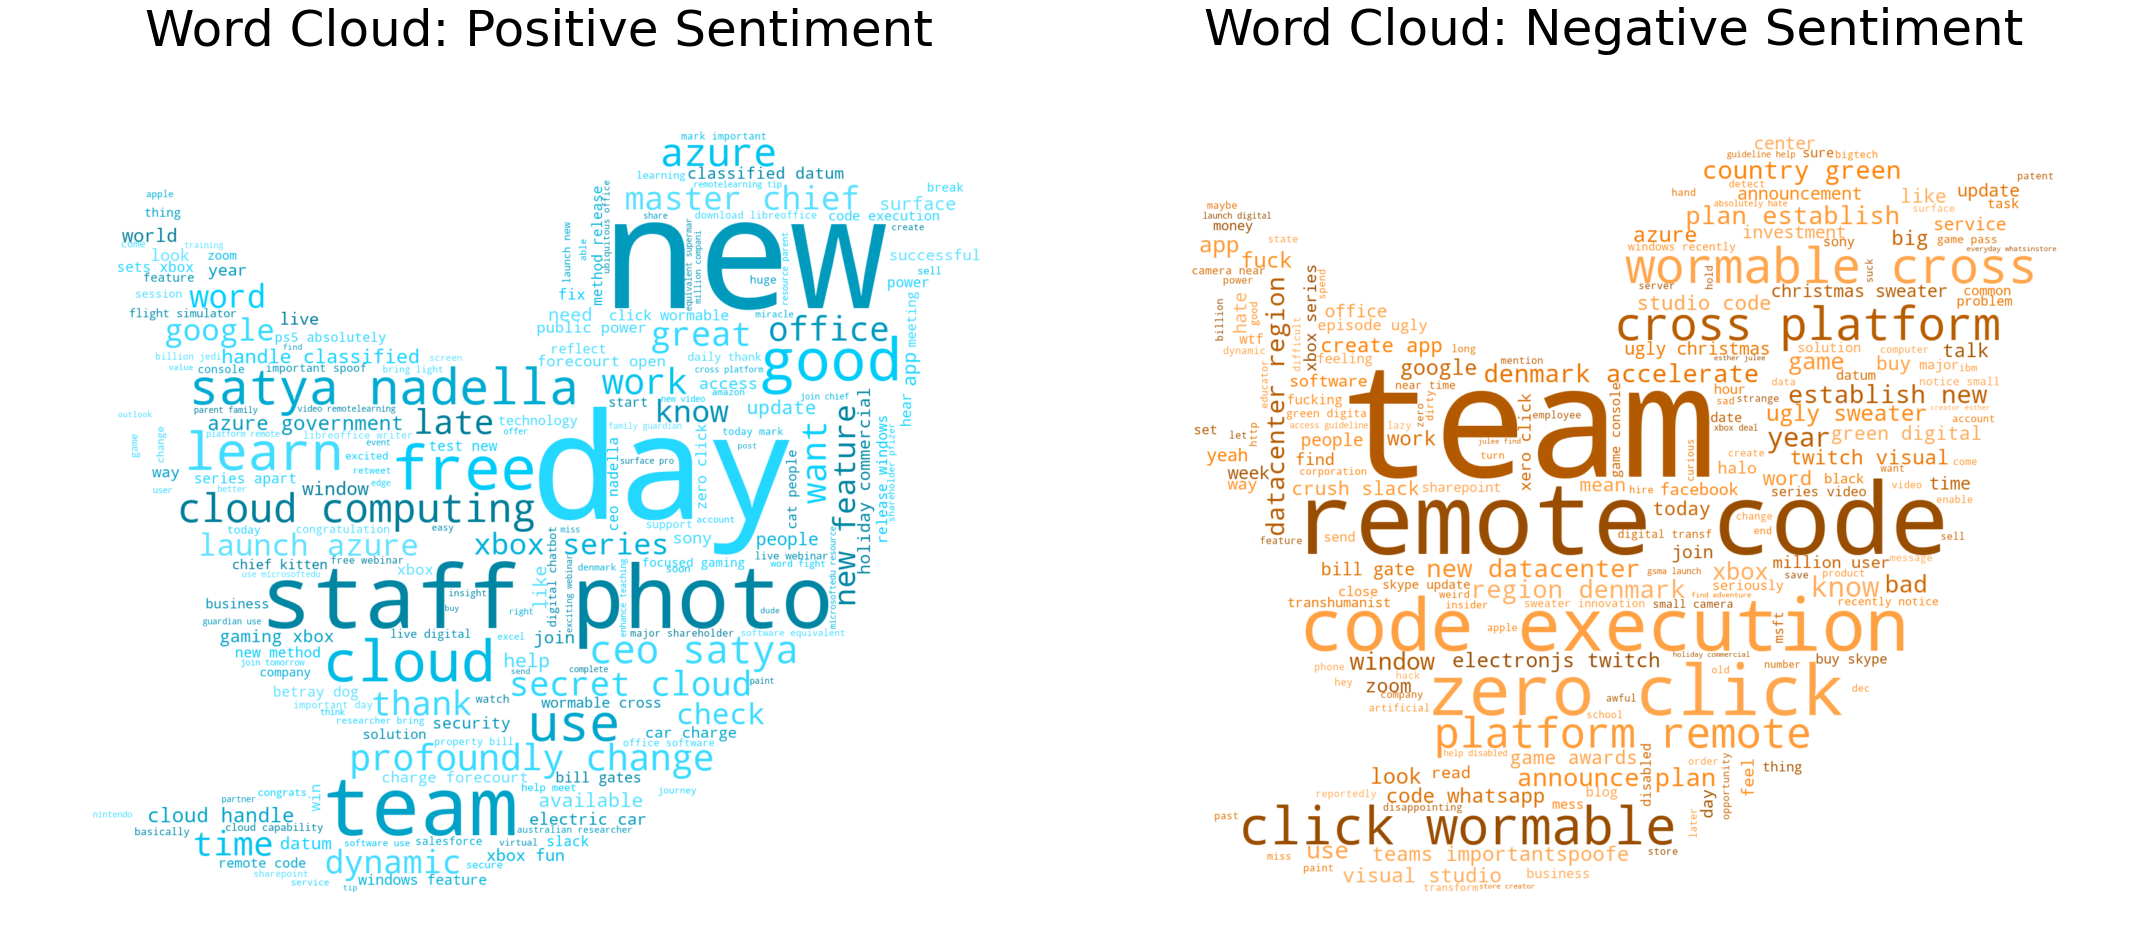

In [299]:
wc_pos = WordCloud(mask=mask, background_color="white", stopwords=stopword_list,
                   max_font_size=256,
                   random_state=42, width=mask.shape[1]*1.8,
                   height=mask.shape[0]*1.8, color_func=similar_color_func_blue)
wc_pos.generate(','.join(df[df['sentiment']>0]['clean']))

wc_neg = WordCloud(mask=mask, background_color="white", stopwords=stopword_list,
            max_font_size=256,
            random_state=42, width=mask.shape[1]*1.8,
            height=mask.shape[0]*1.8, color_func=similar_color_func_orange)
wc_neg.generate(','.join(df[df['sentiment']<0]['clean']))

fig, axes = plt.subplots(ncols=2, figsize=(30,15))
axes[0].axis('off')
axes[0].imshow(wc_pos, interpolation="bilinear")
axes[0].set_title('Positive Sentiment', fontdict={'fontsize': 50, 'fontweight': 'medium'})

axes[1].axis('off')
axes[1].imshow(wc_neg, interpolation="bilinear")
axes[1].set_title('Negative Sentiment', fontdict={'fontsize': 50, 'fontweight': 'medium'})

plt.tight_layout()
plt.savefig('testplot.png')

In [309]:
fig.savefig('testplot.png')

In [301]:
plt.show(fig)

In [304]:
go.Figure(wc_pos)

ValueError: 
    Invalid element(s) received for the 'data' property of 
        Invalid elements include: [<wordcloud.wordcloud.WordCloud object at 0x17b99b208>]

    The 'data' property is a tuple of trace instances
    that may be specified as:
      - A list or tuple of trace instances
        (e.g. [Scatter(...), Bar(...)])
      - A single trace instance
        (e.g. Scatter(...), Bar(...), etc.)
      - A list or tuple of dicts of string/value properties where:
        - The 'type' property specifies the trace type
            One of: ['area', 'bar', 'barpolar', 'box',
                     'candlestick', 'carpet', 'choropleth',
                     'choroplethmapbox', 'cone', 'contour',
                     'contourcarpet', 'densitymapbox', 'funnel',
                     'funnelarea', 'heatmap', 'heatmapgl',
                     'histogram', 'histogram2d',
                     'histogram2dcontour', 'image', 'indicator',
                     'isosurface', 'mesh3d', 'ohlc', 'parcats',
                     'parcoords', 'pie', 'pointcloud', 'sankey',
                     'scatter', 'scatter3d', 'scattercarpet',
                     'scattergeo', 'scattergl', 'scattermapbox',
                     'scatterpolar', 'scatterpolargl',
                     'scatterternary', 'splom', 'streamtube',
                     'sunburst', 'surface', 'table', 'treemap',
                     'violin', 'volume', 'waterfall']

        - All remaining properties are passed to the constructor of
          the specified trace type

        (e.g. [{'type': 'scatter', ...}, {'type': 'bar, ...}])

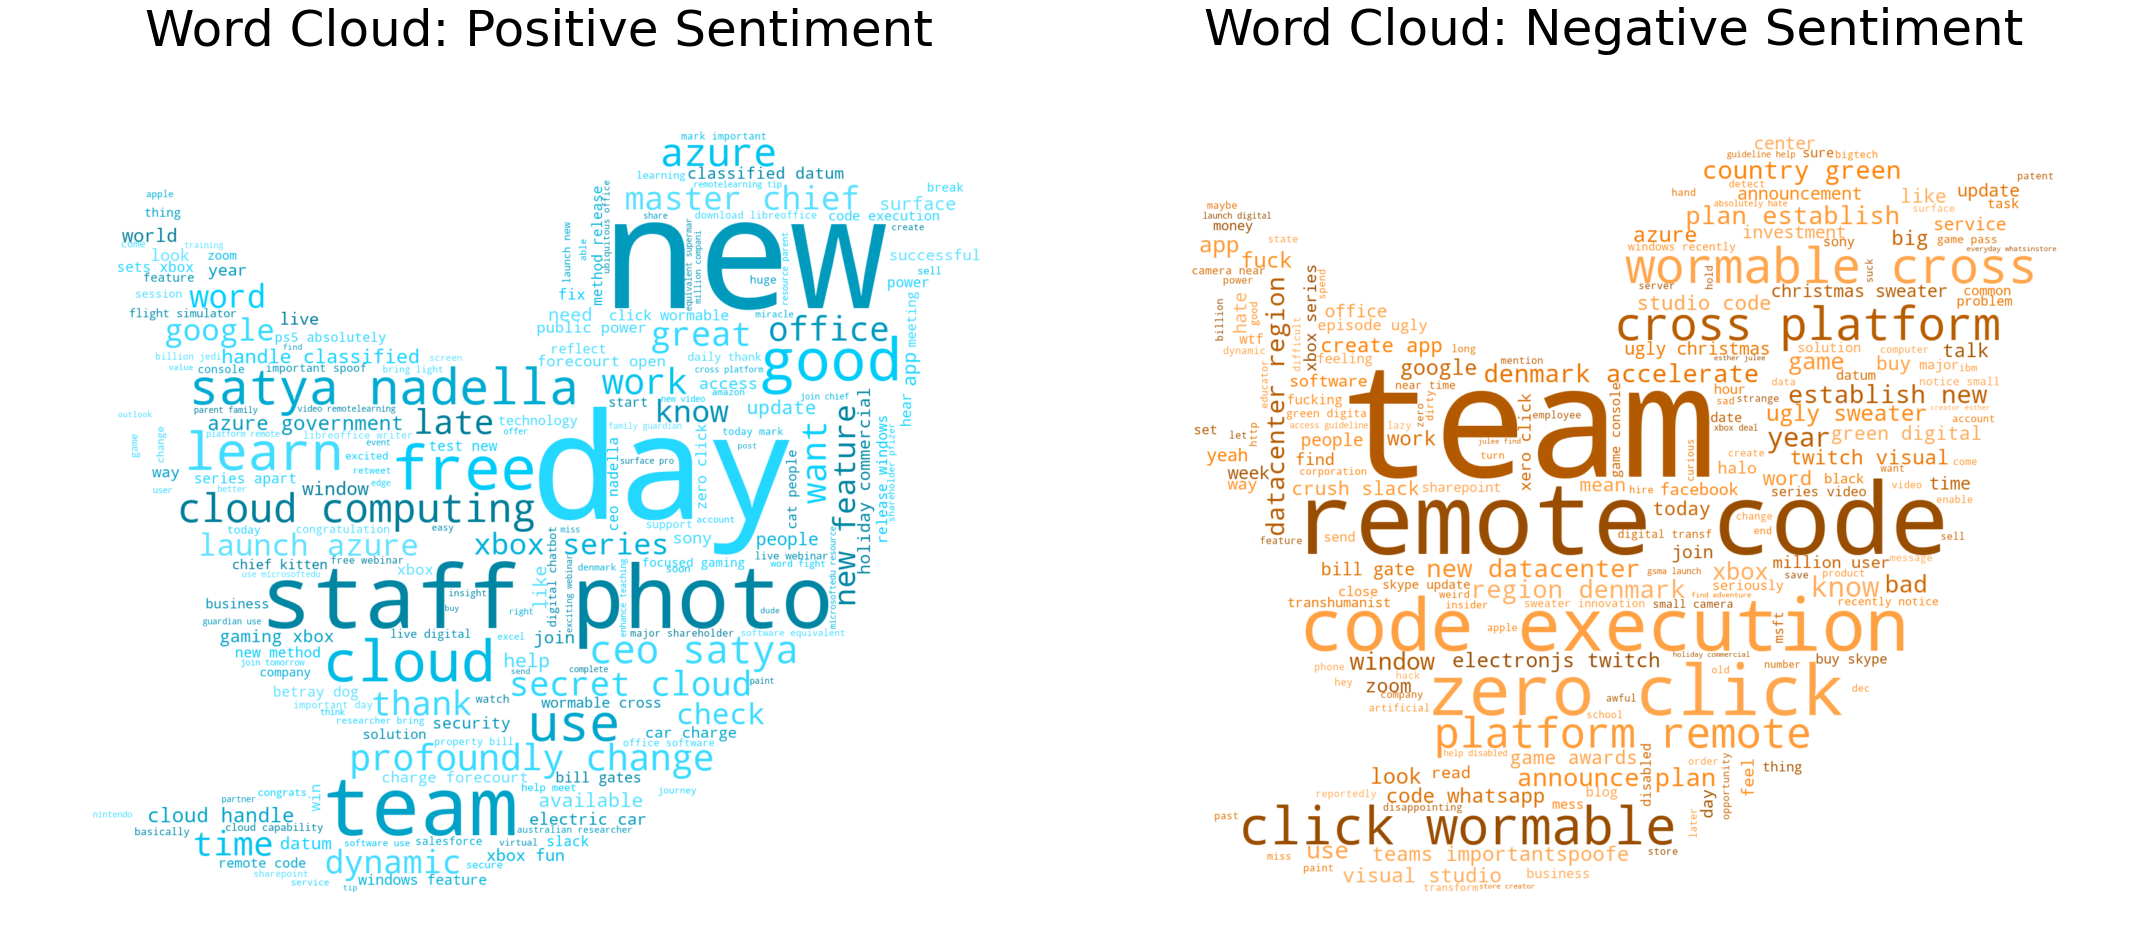

In [307]:
fig

In [385]:
fig.savefig('images/example.png')

# Combining Two Datasets

In [ ]:
import sqlite3
import pandas as pd

conn = sqlite3.connect('data/twitter.db')
c = conn.cursor()

df = pd.read_sql("SELECT * FROM sentiment", 
                 conn)

In [312]:
df['clean'] = df['tweet'].apply(clean_text)

In [323]:
conn = sqlite3.connect('data/twitter_2.db')
c = conn.cursor()

df_2 = pd.read_sql("SELECT * FROM sentiment", 
                 conn)

In [329]:
df_2

,unix,id,user,tweet,clean,favorite,retweet,sentiment
0,1.607366e+12,1336016852007481344,1130133311957995526,RT @blushinwon: Shinwon trainee story: \n- Yan...,shinwon trainee story yanan innocence training...,0,0,0.000000
1,1.607366e+12,1336016852007456768,3818500093,@CompleteSEOBiz I will MANUALLY create 35 prof...,will manually create profile authority site us...,0,0,0.000000
2,1.607366e+12,1336016852527374336,1176947258597576704,People are really upset he’s wearing a mask in...,people really upset wear mask car lmaooo bruh ...,0,0,0.416667
3,1.607366e+12,1336016852233957376,1146861690530619392,not an ipad selfie but i look hot so https://t...,not ipad selfie but look hot,0,0,0.250000
4,1.607366e+12,1336016852917645312,1260386671738183682,@kmandei3 Nice😍😍😍 old car\n\n2020 Tesla Model ...,nice old car tesla model review,0,0,0.100000
...,...,...,...,...,...,...,...,...
137552,1.607373e+12,1336044265160527872,2896291055,me and kiki are watching star trek deep space ...,and kiki watch star trek deep space nine and h...,0,0,0.000000
137553,1.607373e+12,1336044265521164291,889562481030565889,RT @ASlavitt: All the questions you want answe...,all the question you want answer about the vac...,0,0,0.300000
137554,1.607373e+12,1336044265680625664,1008067145828315138,What's this Snapchat fleeting thing?! Its caus...,what this snapchat fleeting thing its cause ma...,0,0,-0.700000
137555,1.607373e+12,1336044265785397249,1150400124465700864,Just posted a photo https://t.co/ckmh96NiVg,just post photo,0,0,0.000000


In [326]:
cols = list(df_2.columns)

In [328]:
df[cols]

,unix,id,user,tweet,clean,favorite,retweet,sentiment
0,1.607337e+12,1335892300312940545,1282441723801559043,RT @ScottZILWarrior: I'll send $250 to one ran...,will send one random person who retweet this a...,0,0,-0.250000
1,1.607337e+12,1335892299541319681,1235233821626429440,Stuck in the Window https://t.co/SYzg3f3SEx #s...,stick the window stick stucky stuckinplastic s...,0,0,0.000000
2,1.607337e+12,1335892300887560192,2917436322,thinking abt how treasure probably already got...,think abt how treasure probably already get th...,0,0,0.000000
3,1.607337e+12,1335892302007418881,951623635621462016,LISA oftenly post something yet she got top ...,lisa oftenly post something yet she get top wi...,0,0,0.233333
4,1.607337e+12,1335892302456180738,1151371763256709120,RT @WWEXOL: [SCHEDULE] #KAI will be the specia...,schedule kai will the special for ebs radio li...,0,0,-0.196429
...,...,...,...,...,...,...,...,...
540379,1.607366e+12,1336016532799942657,258924827,RT @PeterFinchGolf: Win a Bushnell Tour V5!! T...,win bushnell tour enter the giveaway follow an...,0,0,1.000000
540380,1.607366e+12,1336016533487833092,312530904,"RT @reebecatavares: It's on, guys! Time to giv...",guy time give out the sign jersey promise have...,0,0,0.000000
540381,1.607366e+12,1336016533852745730,4248952035,"From ""Teardrops on a Blank Page"" #NowPlaying ""...",from teardrop blank page nowplaying boundary e...,0,0,0.000000
540382,1.607366e+12,1336016533965901824,1085417888683606017,Art Basel Maimi\n\nHave you been? \n\nYou will...,art basel maimi have you you will find the mos...,0,0,0.550000


In [330]:
df[cols].to_sql('sentiment', conn, if_exists='append', index=False)

In [331]:
conn = sqlite3.connect('data/twitter_2.db')
c = conn.cursor()

df_2 = pd.read_sql("SELECT * FROM sentiment", 
                 conn)
df_2.shape

(681093, 8)

combined!

# Using NN model

In [349]:
conn = sqlite3.connect('data/twitter_3.db')
c = conn.cursor()

df_2 = pd.read_sql("SELECT * FROM sentiment", 
                 conn)
df_2.shape

(110, 9)

In [350]:
df_2['tweet'].iloc[0]

'Ima jus slide this in ONE time. Forgive me y’all please.  https://t.co/iU6AHm6hTq'

In [351]:
df_2['proba'].iloc[0]

b'6gu?'

In [353]:
df_2[['clean', 'sentiment', 'proba']].tail(20)

,clean,sentiment,proba
90,take part our christmas giveaway and win bowie...,1.000000,0.999109
91,snapchat with snapchat with iphone android,0.000000,0.999637
92,check out ford car owners manual guide first p...,0.250000,0.999261
93,use for ios add new feature instagram,0.170455,0.997896
94,you can get will able get room the bay for nex...,0.325000,-0.924473
95,tesla musk move private foundation texas bloom...,0.000000,-0.918895
96,google stadia now available eight more europea...,0.300000,0.723543
97,the late relax cayman daily news instagram,0.250000,0.999441
98,they really give stoff fucking playstation cry,-0.200000,-0.999221
99,hey you guy know that the new game bar absolut...,-0.315909,-0.999572


In [357]:
df_2[['unix', 'tweet', 'sentiment']].values.tolist()

[[1607373636619.0,
  'Ima jus slide this in ONE time. Forgive me y’all please.  https://t.co/iU6AHm6hTq',
  0.0],
 [1607373636612.0,
  '@SweatbandTv Agreed. Posting “gameplay” or “stream highlights” is not an effective way to grow on YouTube. In my op… https://t.co/koCAsVx3J5',
  0.6],
 [1607373636700.0,
  'Smbody told me dat I speak 2 abusive, vulgar, small towner, ghetto as an "IITIAN". I sud maintain certain gravity &amp;… https://t.co/iW8QZT7EPd',
  -0.24523809523809523],
 [1607373636794.0,
  'Millions of Americans are heading into the holidays unemployed and over $5,000 behind on rent - The Washington Post https://t.co/EBqJ1wRW4e',
  -0.4],
 [1607373636561.0,
  'When we say this #keto dessert is foolproof, we mean it. Marvel at Jel Cream Cheese Candies that require ONLY TWO i… https://t.co/DUMdWvDwCa',
  -0.15625],
 [1607373636798.0,
  'Rest in Power &amp;Peace\nNatalie Desselle \nFrom Louisiana and so talented \n#2020fucku\nShe was so good in How To Be A Pl… https://t.co/n7Yoe33X

In [360]:
df.sort_values('sentiment', ascending=False)

,unix,id,user,tweet,favorite,retweet,sentiment,clean
410728,1.607360e+12,1335991549356691458,1329798715003990017,@Sexy_Eggie Brilliant content! Your content is...,0,0,1.0,brilliant content your content really impressi...
468705,1.607363e+12,1336002781065437188,47708754,RT @dpatsmith: The Trump family keeps telling ...,0,0,1.0,the trump family keep tell this lie that daddy...
468603,1.607363e+12,1336002764653072385,1176914962415005696,RT @CursedAngelYT: ANY GOOD GUARDS ON PS5 ?!?!...,0,0,1.0,any good guard ps5
468614,1.607363e+12,1336002766460825604,38679388,@Xeno002 Hi there. Could you let us know how a...,0,0,1.0,there could you let know how you access gmail ...
180882,1.607348e+12,1335940624483115008,808681511717339136,"RT @StickSkating: Happy 26th Birthday, Yuzu!\n...",0,0,1.0,happy birthday yuzu happybirthdayyuzu happybir...
...,...,...,...,...,...,...,...,...
438535,1.607361e+12,1335996551655686144,23137964,RT @shossy2: Are we talking about the 'robust'...,0,0,-1.0,talk about the robust economy here mexico chin...
495322,1.607364e+12,1336008784523780096,1150871649975197697,Ya boring \n#illustration #art #marker https:/...,0,0,-1.0,bore illustration art marker
242531,1.607351e+12,1335953756614086657,315043608,I know Microsoft is a sponsor. But it is real bad,0,0,-1.0,know microsoft sponsor but real bad
242391,1.607351e+12,1335953724460707840,797223714,RT @FridaGhitis: Dr Birx: Winter coronavirus s...,0,0,-1.0,birx winter coronavirus surge the bad event th...


In [361]:
a = 'abc'

In [362]:
a.capitalize()

'Abc'

<a href="https://twitter.com/statuses/">CLICK ME</a>'

In [363]:
import html

In [365]:
help(html)

Help on package html:

NAME
    html - General functions for HTML manipulation.

MODULE REFERENCE
    https://docs.python.org/3.6/library/html
    
    The following documentation is automatically generated from the Python
    source files.  It may be incomplete, incorrect or include features that
    are considered implementation detail and may vary between Python
    implementations.  When in doubt, consult the module reference at the
    location listed above.

PACKAGE CONTENTS
    entities
    parser

FUNCTIONS
    escape(s, quote=True)
        Replace special characters "&", "<" and ">" to HTML-safe sequences.
        If the optional flag quote is true (the default), the quotation mark
        characters, both double quote (") and single quote (') characters are also
        translated.
    
    unescape(s)
        Convert all named and numeric character references (e.g. &gt;, &#62;,
        &x3e;) in the string s to the corresponding unicode characters.
        This function uses

In [371]:
import datetime

In [376]:
str(datetime.datetime.now())


'2020-12-08 02:44:25.349573'